# <font color="orange">Perceptron: Neurônio artificial </font>

 **Data Scientist Jr.: Dr.Eddy Giusepe Chirinos Isidro**



``Perceptron`` é uma rede neural de camada única e um ``Perceptron de várias camadas é chamado de Rede Neural Artificial``. O Perceptron é um classificador linear (binário). Além disso, é usado na aprendizagem supervisionada e pode ser usado para classificar os dados de entrada fornecidos.

Link de estudo: [Perceptron](https://www.youtube.com/watch?v=dkhXGTersP0)

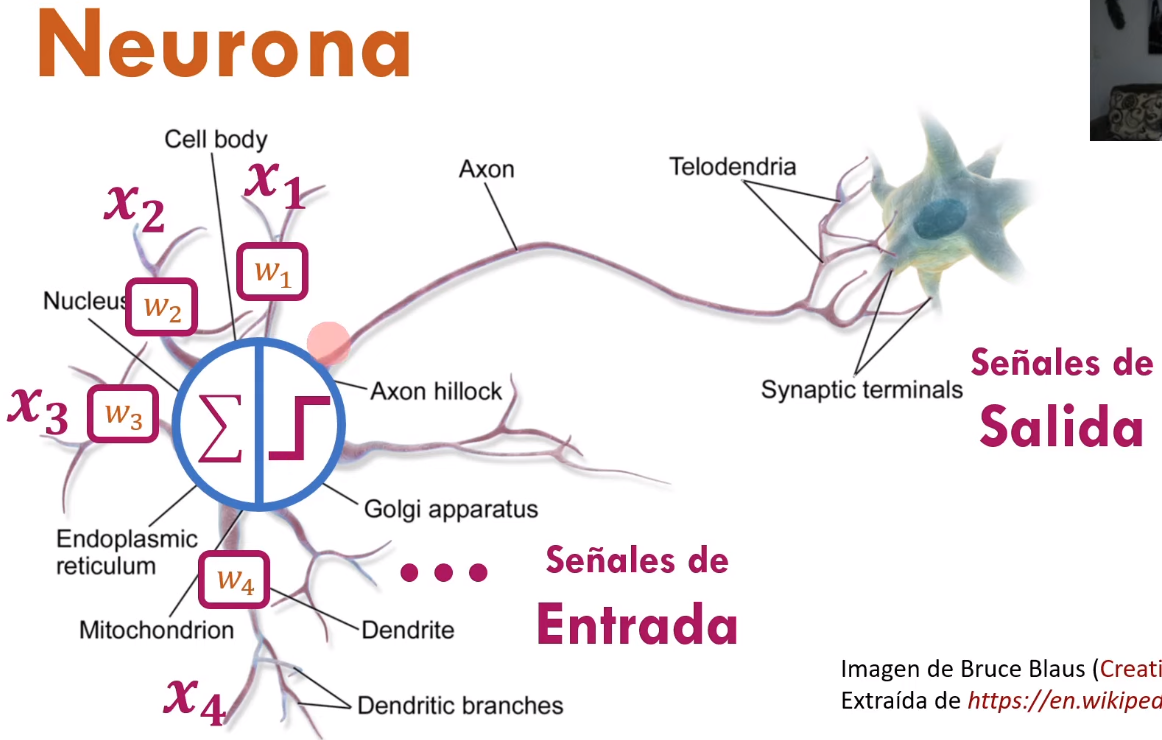

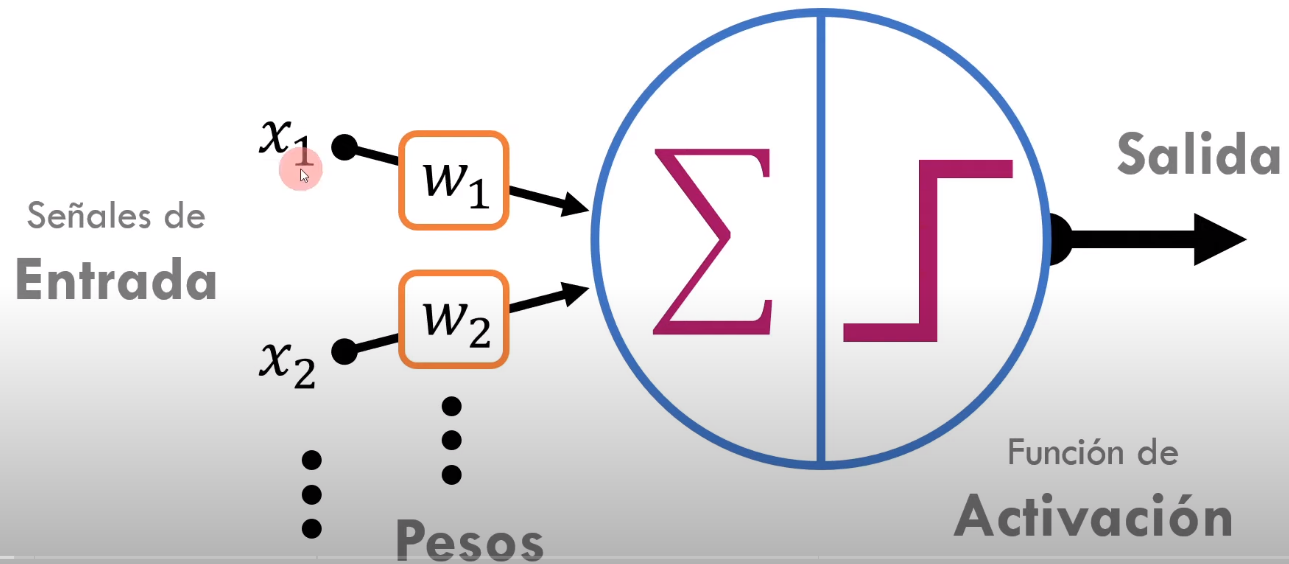

## <font color="orange">Dados linearmente separáveis</font>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
# Dados de 10 pessoas --> [Idade, ahorro]

personas = np.array([[0.3, 0.4],[0.4, 0.3],
                    [0.3, 0.2],[0.4, 0.1],
                    [0.5, 0.2],[0.4, 0.8],
                    [0.6, 0.8],[0.5, 0.6],
                    [0.7, 0.6],[0.8, 0.5]])

In [3]:
personas.shape

(10, 2)

In [4]:
# Python DataFrame --> Alterando nomes das colunas:  https://www.youtube.com/watch?v=k_C5szI5V7Q

personas_df = pd.DataFrame(personas)
personas_df.columns = ['Idade', 'Ahorro'] # Quando quero trocar todos os nomes da minhas colunas
personas_df.head(3)


,Idade,Ahorro
0,0.3,0.4
1,0.4,0.3
2,0.3,0.2


In [5]:
personas_df_other = pd.DataFrame(personas)
personas_df_other.rename(columns={0:'col_Idade', 1:'col_Ahorro'}, inplace=True)
personas_df_other.head(4)

,col_Idade,col_Ahorro
0,0.3,0.4
1,0.4,0.3
2,0.3,0.2
3,0.4,0.1


In [6]:
# 1 --> aprobada   0 --> denegada

clases  = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) 
clases.shape

(10,)

## <font color="orange">Gráfica de dispersão</font>

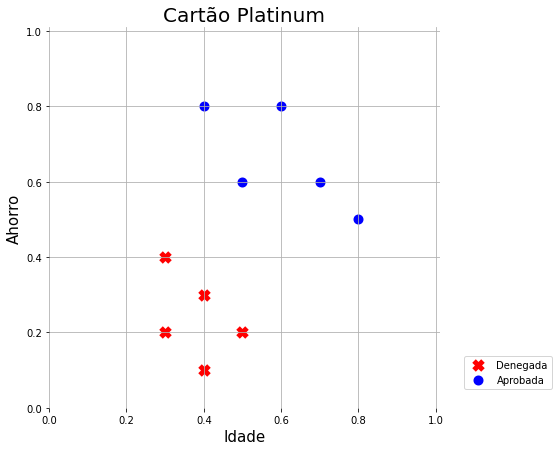

In [7]:
plt.figure(figsize=(7, 7))
plt.title("Cartão Platinum", fontsize = 20)

plt.scatter(personas[clases == 0].T[0],
            personas[clases == 0].T[1],
            marker="x", s=80, color='red',
            linewidths=5, label="Denegada")

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1],
            marker="o", s=25, color='blue',
            linewidths=5, label="Aprobada")

plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Ahorro', fontsize = 15)
plt.legend(bbox_to_anchor = (1.3, 0.15))
plt.box(False)
plt.xlim(0, 1.01)
plt.ylim(0, 1.01)
plt.grid()
plt.show()

# Nota que temos os Dados na mesma escla... para poder ter um bom desempenho do nosso Perceptgron

## <font color="orange">Função de ativação</font>

In [8]:
# Vamos a criar uma função de ativação
# w1*x1 + w2*x2 + ... + wn*xn 

def activation(pesos, x, b): # pesos--> vector; x --> [idade, ahorro]b --> umbral=Bias
    z = pesos * x           # x1*w1 + x2*w2 + umbral > 0  |  x1 --> Idade ; x2 --> ahorro
    if z.sum() + b > 0:     # b --> Bias
        return 1
    else:
        return 0
    

In [9]:
# size = 2 --> genera um vetor de 2 pesos  (duas entradas)  
pesos = np.random.uniform(-1, 1, size = 2)     # O vetor de pesos os desconhecemo... geralmente valores arbitrários
b = np.random.uniform(-1, 1)

In [10]:
pesos, b, activation(pesos, [0.5, 0.5], b) # [0.5, 0.5] --> [50 anos de idade, 50000 dólares ahorrados]

(array([-0.18840494,  0.49202907]), -0.11807282462543589, 1)

   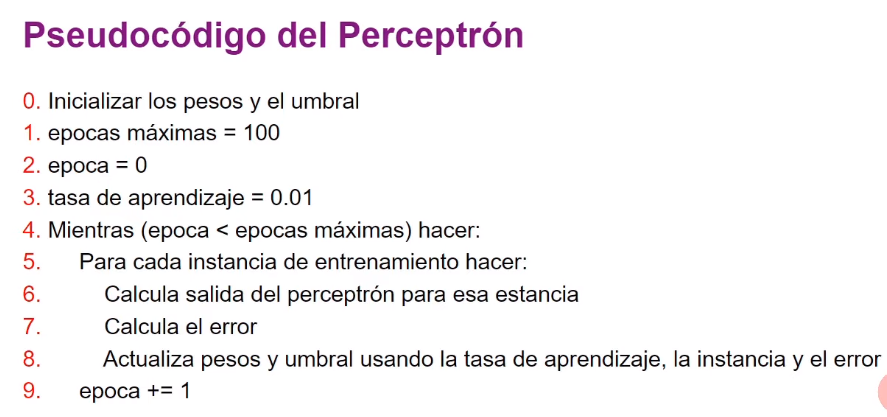

## <font color="orange">Treinamento do Perceptron</font>

In [35]:
pesos = np.random.uniform(-1, 1, size = 2)     
b = np.random.uniform(-1, 1)
tasa_de_aprendizaje = 0.01
epocas = 100



for epoca in range(epocas):
    
    erro_total = 0
    
    for i in range(len(personas)):
        prediccion = activation(pesos, personas[i], b)
        erro = clases[i] - prediccion
        erro_total += erro**2
        
        pesos[0] += tasa_de_aprendizaje * personas[i][0] * erro
        pesos[1] += tasa_de_aprendizaje * personas[i][1] * erro
        b += tasa_de_aprendizaje * erro
    print(erro_total, end = " ")                        



5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [36]:
# Aqui teríamos um pessoa de 10 anos de idade a qual tem 0 dólares "ahorrados" (é uma inferência obvia)
print("Esta pessoa de 10 anos de idade e com 0 dólares na conta bancária, terá o seguinte TARGET para ao cartão de crédito: ", activation(pesos, [0.1, 0], b))

Esta pessoa de 10 anos de idade e com 0 dólares na conta bancária, terá o seguinte TARGET para ao cartão de crédito:  0


In [37]:
activation(pesos, [0.5, 0.8], b)

1

# <font color="yellow">Treinamento do Perceptron</font>

A seguir podemos fazer o mesmo, só que utilizando com a Biblioteca do Scikit-learn.

In [38]:
from sklearn.linear_model import Perceptron

In [39]:
perceptron = Perceptron().fit(personas, clases)

In [45]:
print("Fornecendo três Dados obtemos as suas predições:\n")
print("[0.1, 0] --> pessoa de 10 anos de idade com 0 dólares na conta bancária")
print("[0.2, 0.2] --> pessoa de 20 anos de idade com 20000 dólares na conta bancária")
print("[0.8, 0.8] --> pessoa de 60 anos de idade com 80000 dólares na conta bancária\n")

print("A predição é: negado, negado e aceitado", perceptron.predict([[0.1, 0], [0.2, 0.2], [0.6, 0.8]]))

Fornecendo três Dados obtemos as suas predições:

[0.1, 0] --> pessoa de 10 anos de idade com 0 dólares na conta bancária
[0.2, 0.2] --> pessoa de 20 anos de idade com 20000 dólares na conta bancária
[0.8, 0.8] --> pessoa de 60 anos de idade com 80000 dólares na conta bancária

A predição é: negado, negado e aceitado [0 0 1]
